# Time Series Data

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start = '2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.081497,186.857993,182.346189,185.578815,82488700
2024-01-03,182.703186,184.319507,181.890063,182.673439,58414500
2024-01-04,180.382812,181.552899,179.361461,180.620788,71983600
2024-01-05,179.658951,181.225688,178.657435,180.462163,62379700
2024-01-08,184.002182,184.041855,179.976269,180.561312,59144500
2024-01-09,183.585693,183.595604,181.195922,182.375934,42841800
2024-01-10,184.626892,184.835121,182.375945,182.802343,46792900
2024-01-11,184.031937,185.479686,182.078474,184.973958,49128400


# Classical Time Series Decomposition

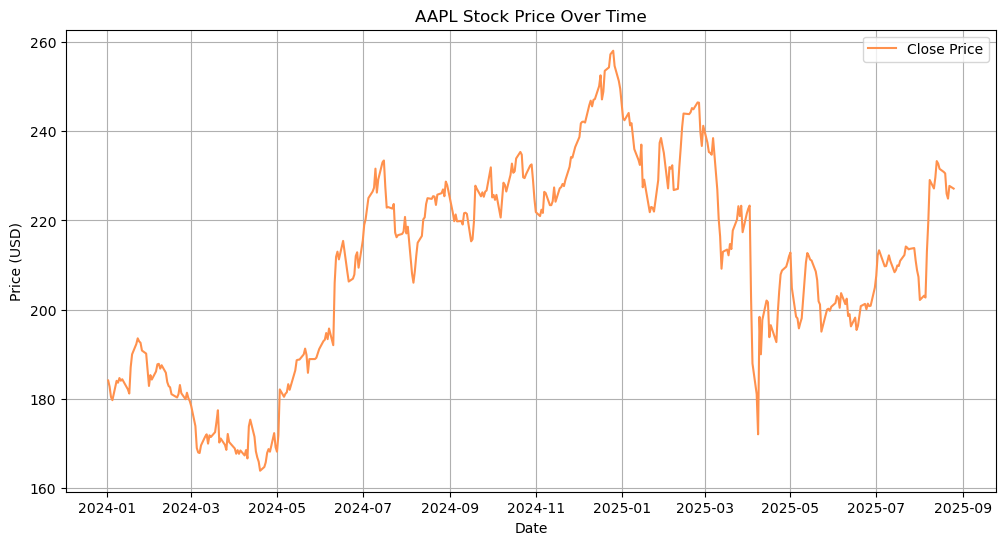

In [2]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label = 'Close Price', color = '#FF914D')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'],  model = 'additive', period=30)

In [4]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

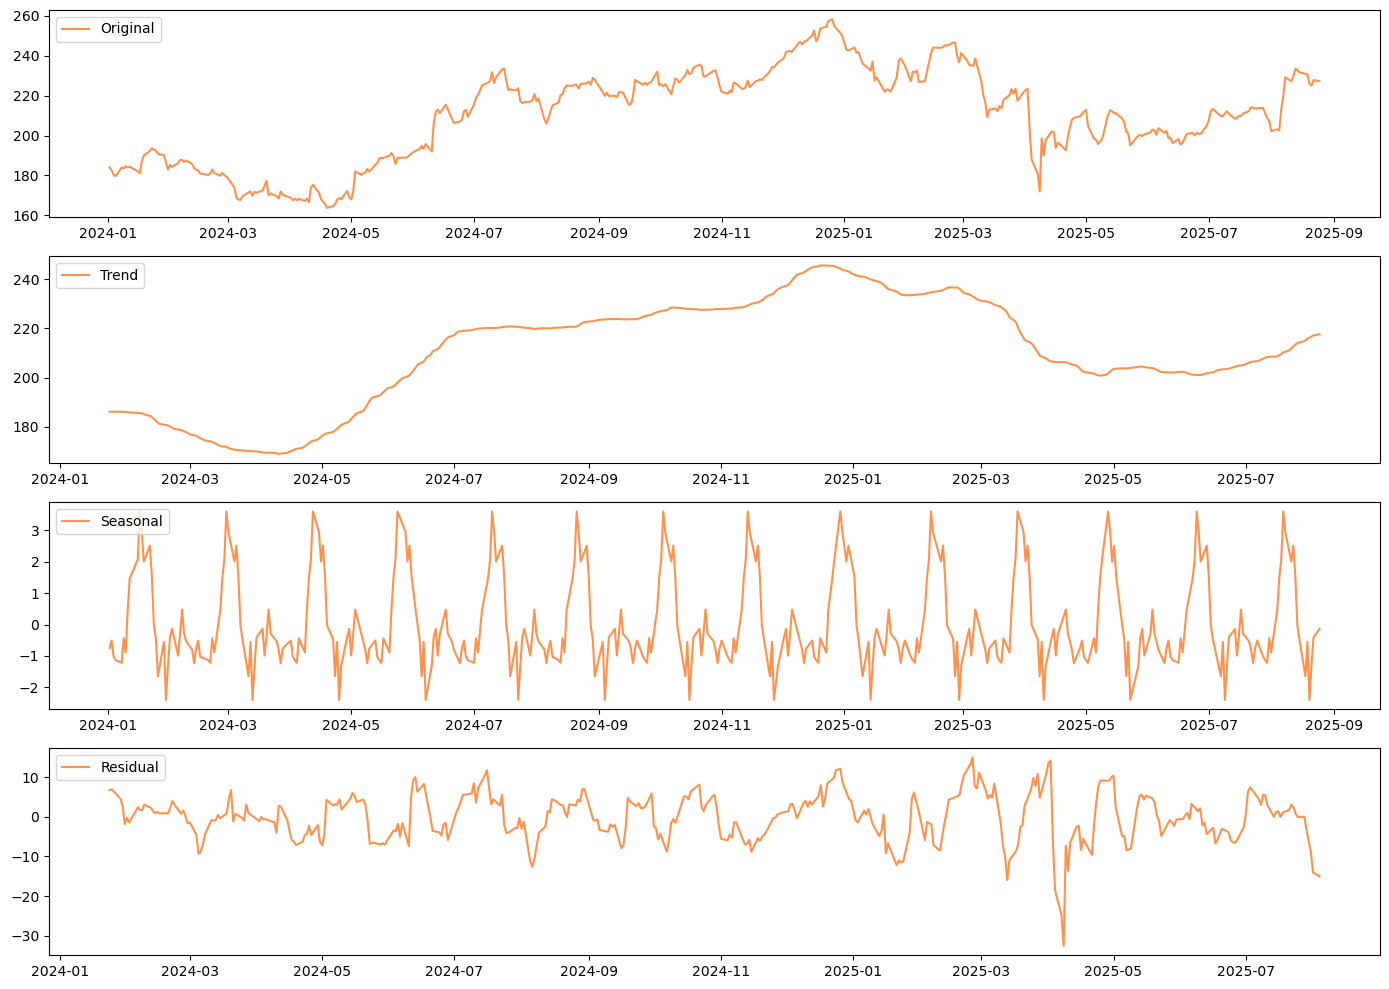

In [5]:
plt.figure(figsize = (14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label = 'Original', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(412)
plt.plot(trend_additive, label = 'Trend', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(413)
plt.plot(seasonal_additive, label = 'Seasonal', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(residual_additive, label = 'Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# STL Decomposition

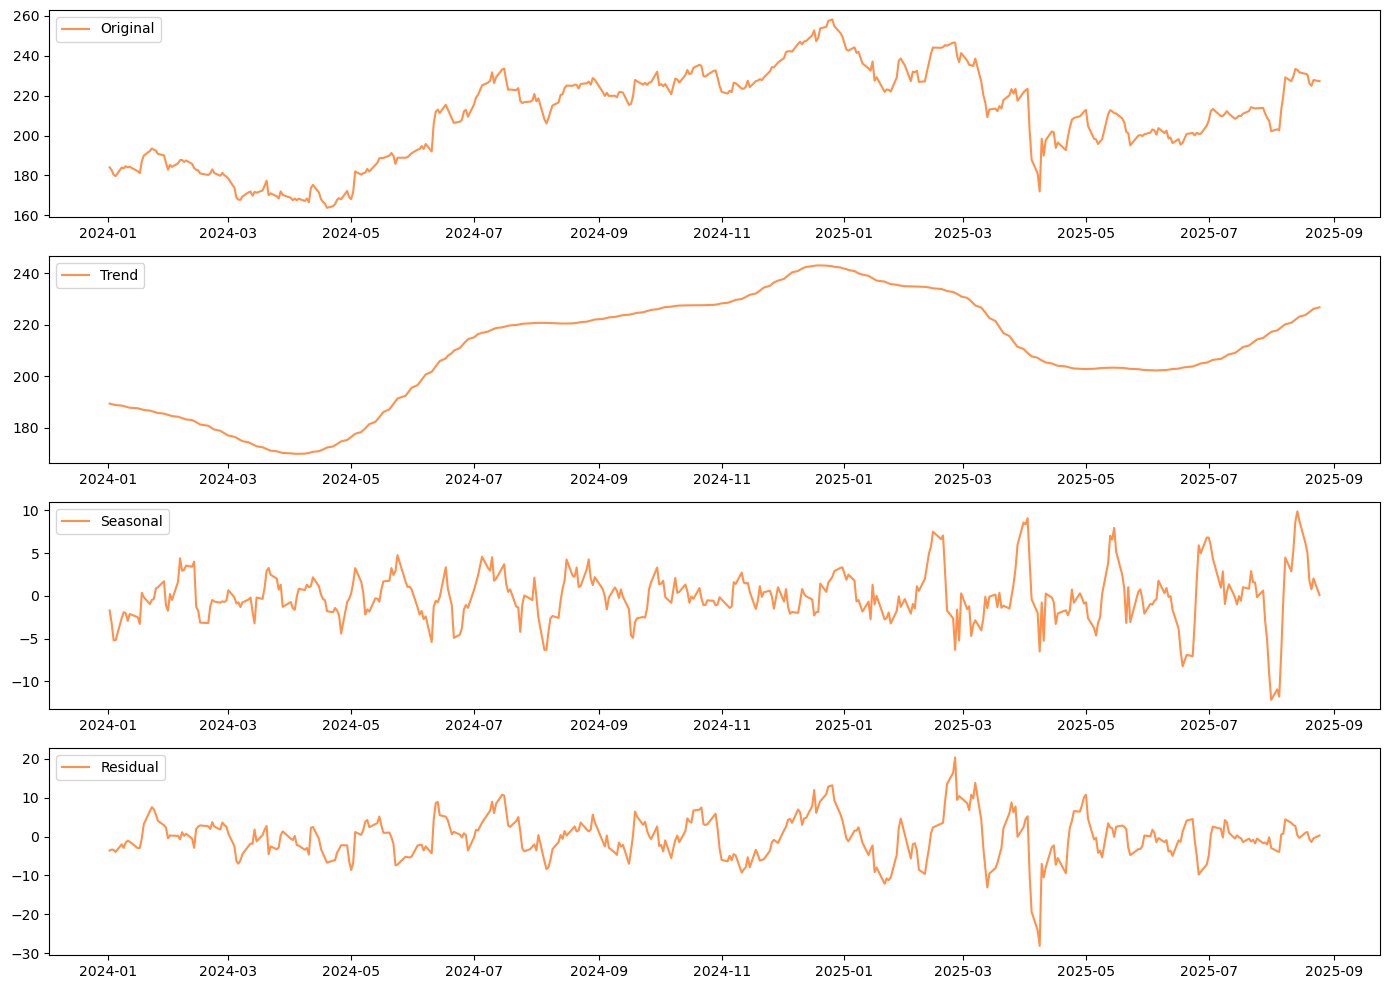

In [6]:
from statsmodels.tsa.seasonal import STL

# perform STL decomposition
stl = STL(stock_data['Close'], period=30)
result = stl.fit()

# plot the decomposition components
plt.figure(figsize = (14,10))
plt.subplot(411)
plt.plot(result.observed, label = 'Original', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(412)
plt.plot(result.trend, label = 'Trend', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(413)
plt.plot(result.seasonal, label = 'Seasonal', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(result.resid, label = 'Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Stationarity Test

## Weak stationarity
## Augmented Dickey Fuller (ADF) Test

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistic:{round(adf_test[0], 3)}')
print(f'p-value:{round(adf_test[1], 3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'  {key}:{round(value,3)}')
# p value >0.05, so this is non-stationary data

ADF Test Results:
ADF Statistic:-1.949
p-value:0.309
Critical Values:
  1%:-3.446
  5%:-2.869
  10%:-2.571


## Kwiatkowski-phillips-Schmidt-shin (KPSS) test

In [8]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression = 'ct') # 'c' for constant (level stationaarity), 'ct' for trend

print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0], 2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'   {key}:{value}')

# p < 5%  then this is nonstationary

KPSS Test Results:
KPSS Statistic: 0.59
p-value: 0.01
Critical Values:
   10%:0.119
   5%:0.146
   2.5%:0.176
   1%:0.216


C:\Users\Mason\AppData\Local\Temp\ipykernel_12044\2939788440.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression = 'ct') # 'c' for constant (level stationaarity), 'ct' for trend


## Strict stationarity
## K-S (Kolmogorov-Smirnov) test

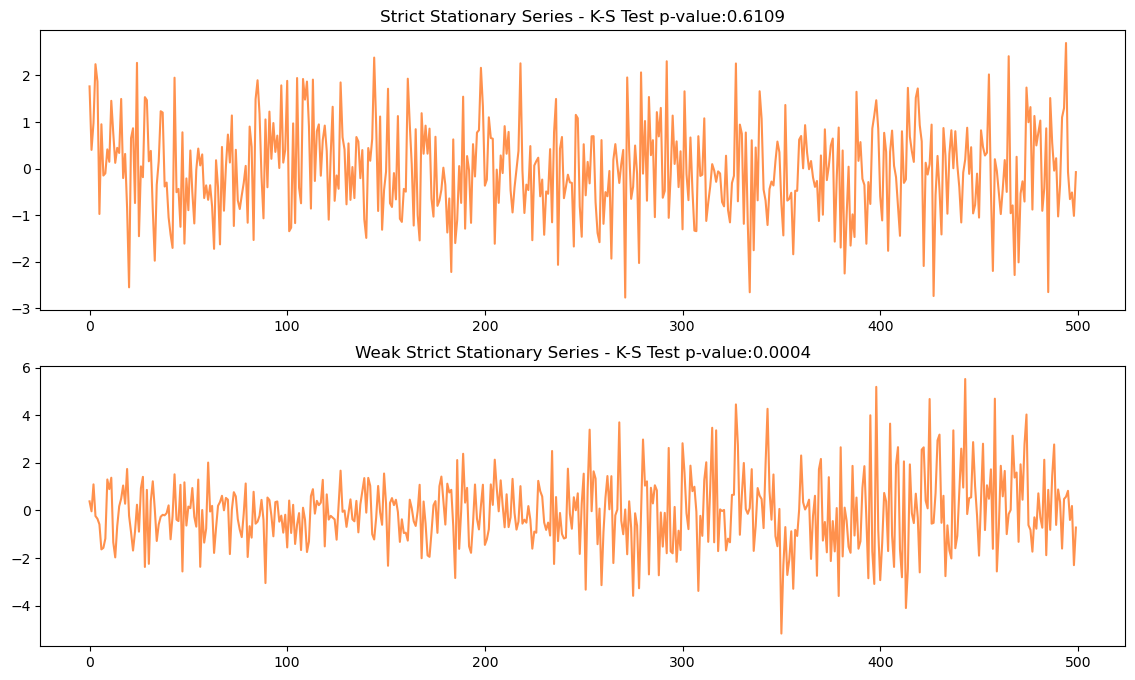

Strict Stationary Series - K-S Test Statistic: 0.068, p-value: 0.6109
Weak Stationary Series - K-S Test Statistic: 0.184, p-value: 0.0004


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# Strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# Non-strictly statinary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
    
])

# Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the K-S test on tricktly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)


# Perform the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)


plt.figure(figsize = (14,8))
plt.subplot(211)
plt.plot(strict_stationary_series, color = '#FF914D')
plt.title(f'Strict Stationary Series - K-S Test p-value:{round(ks_pvalue_strict, 4)}')

plt.subplot(212)
plt.plot(non_strict_stationary_series, color = '#FF914D')
plt.title(f'Weak Strict Stationary Series - K-S Test p-value:{round(ks_pvalue_non_strict, 4)}')
plt.show()
print(f'Strict Stationary Series - K-S Test Statistic: {ks_stat_strict}, p-value: {round(ks_pvalue_strict, 4)}')
# p>0.05 means no differece in distribution 
print(f'Weak Stationary Series - K-S Test Statistic: {ks_stat_non_strict}, p-value: {round(ks_pvalue_non_strict, 4)}')

# Making Data Stationary

In [10]:
# Performing ADF and KPSS tests
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))
        
def kpss_test(series):
    result = kpss(series, regression = 'c')
    print('KPSS Statistic', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

In [11]:
prices = stock_data['Close']
adf_test(prices)
# p > 0.05 not stationary

ADF Statistic: -1.9492451436863074
p-value: 0.3092607458119251
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


In [12]:
prices.head()

Ticker,AAPL
Date,
2024-01-02,184.081497
2024-01-03,182.703186
2024-01-04,180.382812
2024-01-05,179.658951
2024-01-08,184.002182


In [13]:
# first order difference
prices.diff().head()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,-1.378311
2024-01-04,-2.320374
2024-01-05,-0.723862
2024-01-08,4.343231


### Differencing

In [14]:
adf_test(prices.diff().dropna())
# 9.5571177336925e-22 < 0.05 is stationary

ADF Statistic: -11.804753131956938
p-value: 9.152209330952504e-22
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


In [15]:
# second order difference
prices.diff().diff().head()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.942062
2024-01-05,1.596512
2024-01-08,5.067093


In [16]:
import numpy as np
from scipy import stats

#log transformation
price_log = np.log(prices)

#square root transformation
price_sqrt = np.sqrt(prices)

# Box-Cox transformation
# Note: Box-Cox requires all positive values
# prices_boxcox, lam = stats.boxcox(prices[prices > 0])
prices_boxcox, lam = stats.boxcox(np.array(prices[prices > 0]).ravel())

### Transformation - Logarithmic

In [17]:
price_log.head()

Ticker,AAPL
Date,
2024-01-02,5.215379
2024-01-03,5.207863
2024-01-04,5.195081
2024-01-05,5.191060
2024-01-08,5.214948


In [18]:
adf_test(price_log)

ADF Statistic: -1.9261609491044995
p-value: 0.3198560047651029
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


### Transformation - Power

In [19]:
price_sqrt.head()

Ticker,AAPL
Date,
2024-01-02,13.567664
2024-01-03,13.516774
2024-01-04,13.430667
2024-01-05,13.403692
2024-01-08,13.564740


### Transformation - Box-Cox

In [20]:
adf_test(prices_boxcox)
# p value is high, so we are not getting stationary data.

ADF Statistic: -1.9798229879479379
p-value: 0.2954894815591971
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


### De-Trending - Linear

In [21]:
from scipy import signal

# using a linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
# prices_detrended = prices - trendline
prices_detrended = np.array(prices).ravel() - trendline

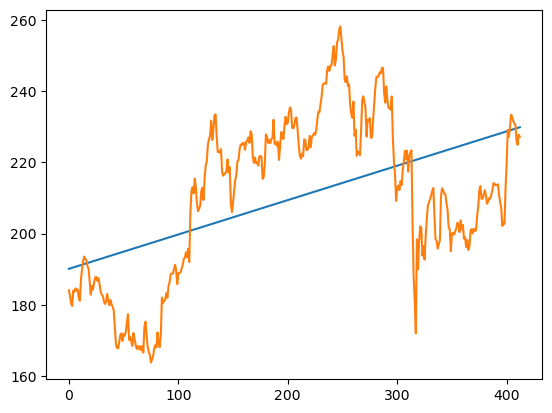

In [22]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)

In [23]:
adf_test(prices_detrended)
# p value > 0.05

ADF Statistic: -2.0899837023987997
p-value: 0.2485612325936391
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


### De-Trending - Moving Average

In [24]:
# Using a linear trend
window = 12 # example window size
prices_ma = prices.rolling(window = window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

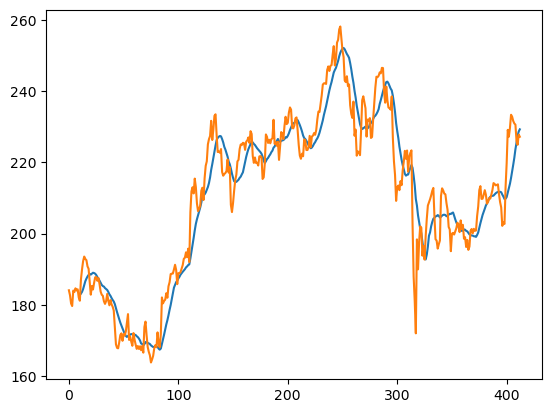

In [25]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

### Seasonal Adjustment

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decompostion using moving averages
decomposition = seasonal_decompose(prices, model = 'additive', period=30)
# prices_adjusted = prices / decomposition.seasonal
prices_adjusted = np.array(prices).ravel() / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [27]:
adf_test(prices_adjusted)
# p value < 0.05 stationary

ADF Statistic: -8.198260060915548
p-value: 7.34861831094021e-13
Critical Value (1%): -3.447
Critical Value (5%): -2.869
Critical Value (10%): -2.571


# White Noise and Random Walk

## Identifying White Noise & Random Walk - Jung Box

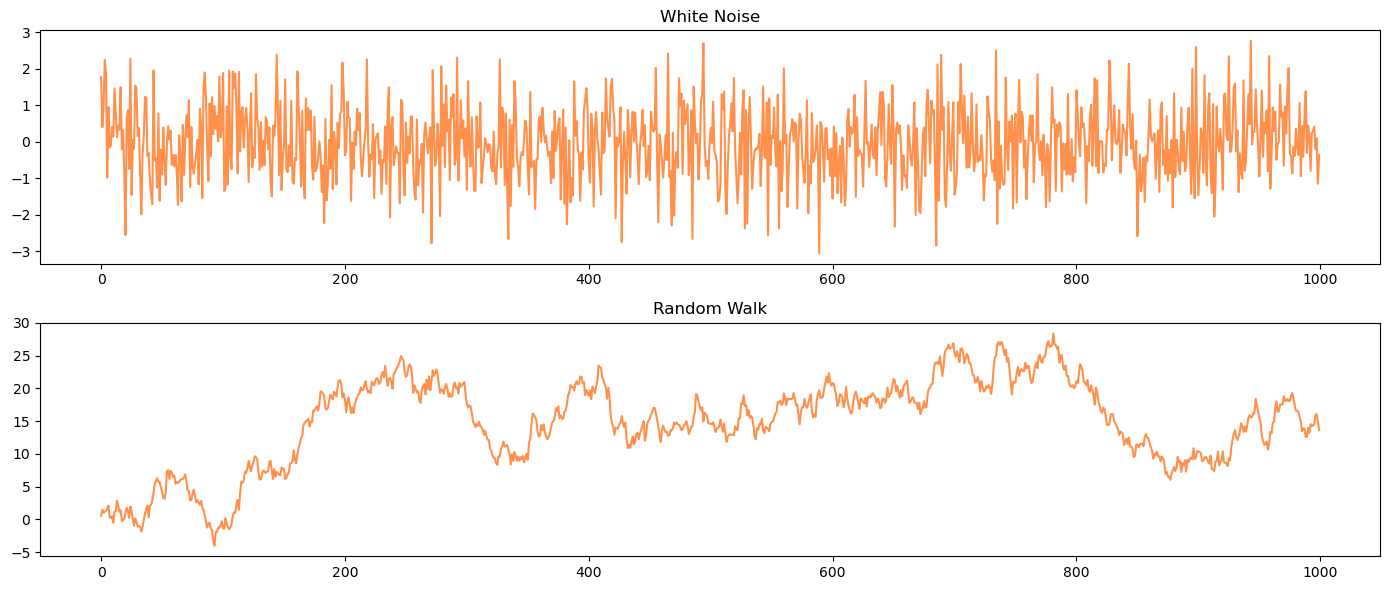


Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828

Ljung-Box Test for Random Walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

# White Noise
white_noise = np.random.normal(0, 1, n)

# Random Walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# Plotting the series
plt. figure(figsize = (14, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise, color = '#FF914D')
plt.title(f'White Noise')

plt.subplot(2, 1, 2)
plt.plot(random_walk, color = '#FF914D')
plt.title(f'Random Walk')

plt.tight_layout()
plt.show()


# Ljung-Box test
print ("\nLjung-Box Test for White Noise:")
lb_test_white_noise = acorr_ljungbox(white_noise, lags = [10], return_df = True)
print(lb_test_white_noise)

print("\nLjung-Box Test for Random Walk:")
lb_test_random_walk = acorr_ljungbox(random_walk, lags = [10], return_df = True)
print(lb_test_random_walk)

# Time Series Forecasting Models

## AR Model

In [29]:
# making data stationary before model fitting 
stock_data = yf.download('AAPL', start = '2023-01-01')

apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
# take the last 30 days as a test data
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


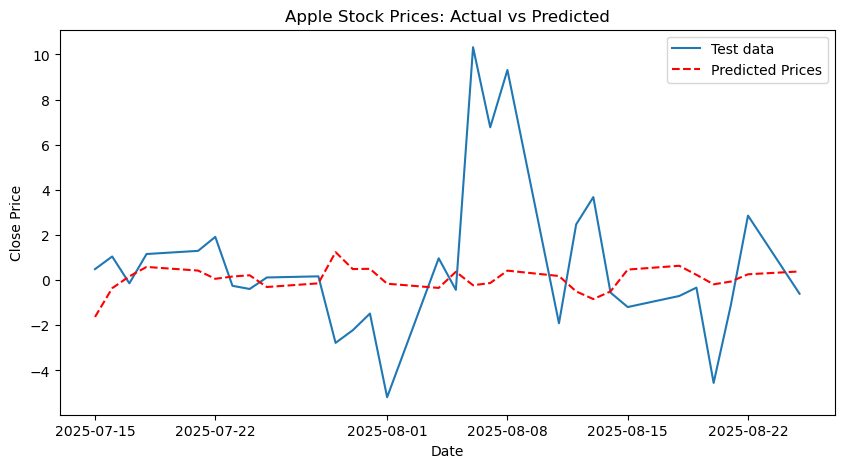

RMSE:  3.52


In [30]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize = (10, 5))
plt.plot(test_data.index, test_data, label = 'Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

## MA Model

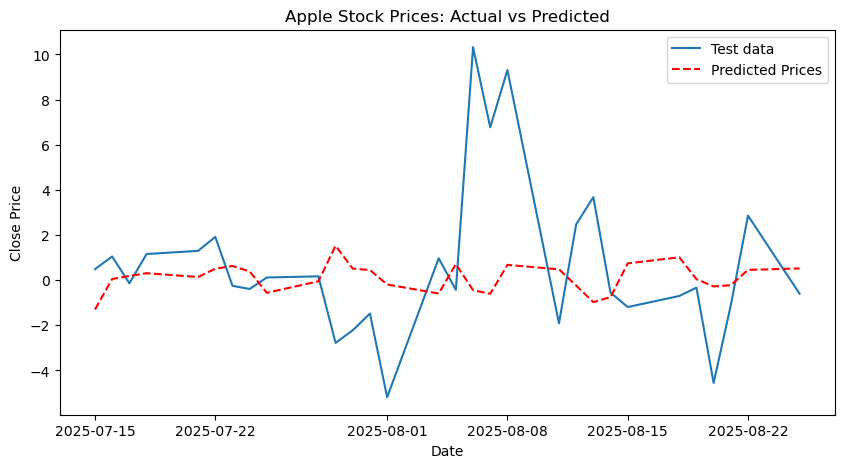

RMSE:  3.56


In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_data, order=(0, 0, 30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

## ARMA Model

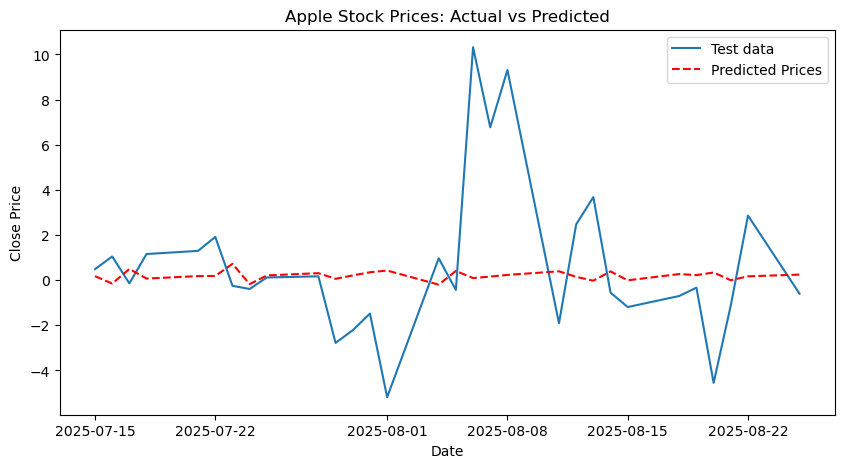

RMSE:  3.42


In [32]:
model = ARIMA(train_data, order=(7, 0, 7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

## ARIMA Model

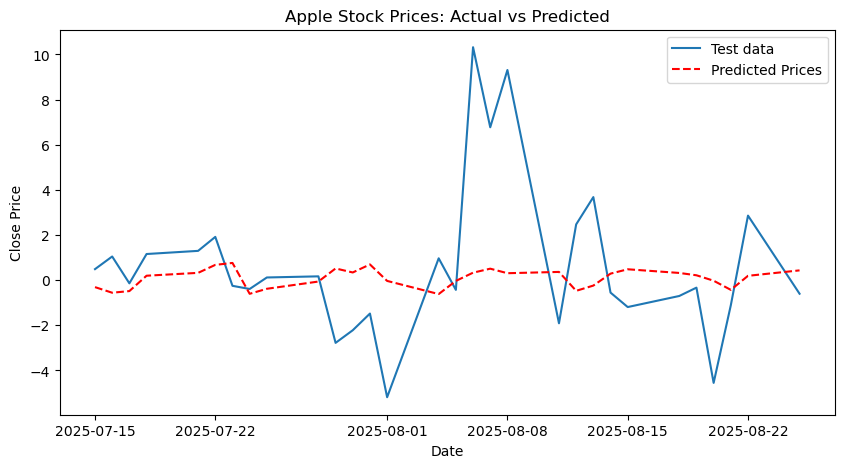

RMSE:  3.38


In [33]:
# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_data, order=(7, 1, 7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

## SARIMA Model

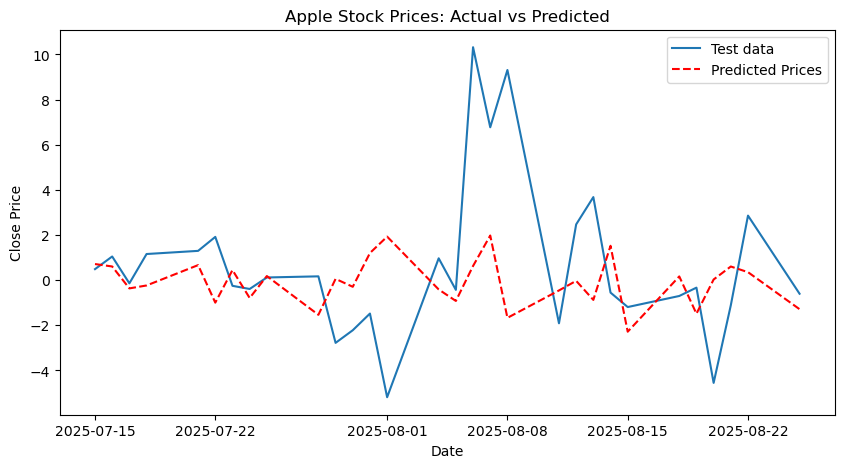

RMSE:  3.61


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 7, 1, 7
P, D, Q, s = 1, 1, 1, 55

model = SARIMAX(train_data, order = (p, d, q), seasonal_order = (P, D, Q, s))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

## Vector Models

In [35]:
stock_data = yf.download('AAPL', start = '2023-01-01')
tsla_data = yf.download('TSLA', start = '2023-01-01')


stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['APPL_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace=True)

from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger-Causality test
grangercausalitytests(stock_data[['APPL_Close', 'TSLA_Close']].dropna(), maxlag=[14])
print()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=10.9914 , p=0.0000  , df_denom=619, df_num=14
ssr based chi2 test:   chi2=161.0885, p=0.0000  , df=14
likelihood ratio test: chi2=143.8674, p=0.0000  , df=14
parameter F test:         F=10.9914 , p=0.0000  , df_denom=619, df_num=14



In [36]:
tsla_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


In [37]:
stock_data.head()

Price,Close,High,Low,Open,Volume,TSLA_Close,APPL_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2023-01-04,124.602715,126.870731,123.340517,125.125343,89113600,113.639999,123.330658
2023-01-05,123.281349,125.993105,123.024970,125.362006,80962700,110.339996,124.602715
2023-01-06,127.817368,128.478048,123.153152,124.257579,87754700,113.059998,123.281349
2023-01-09,128.339981,131.554653,128.083602,128.655538,70790800,119.769997,127.817368
2023-01-10,128.911957,129.434585,126.338253,128.448492,63896200,118.849998,128.339981


In [38]:
data = stock_data[['APPL_Close', 'TSLA_Close']].diff().dropna()
train_data, test_data = data[:-14], data[-14:]

## VAR (Vector Autoregressive)

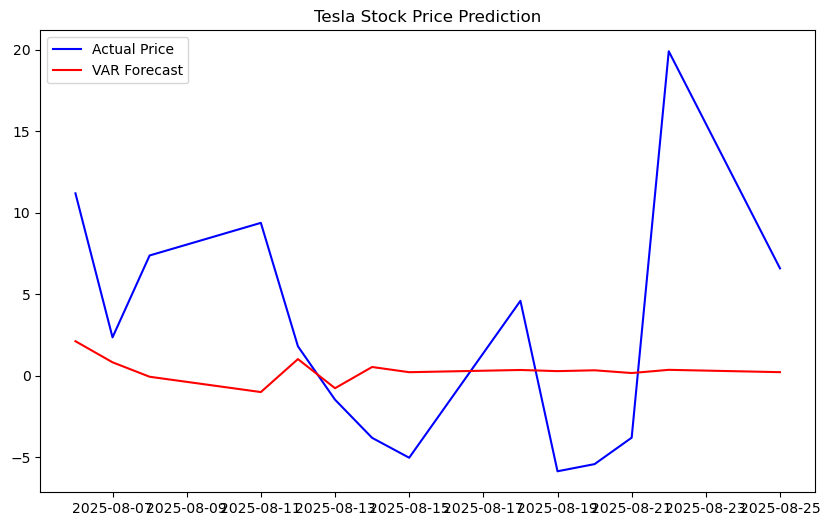

RMSE:  7.66


In [39]:
from statsmodels.tsa.api import VAR, VARMAX

#VAR
model = VAR(train_data)
result = model.fit(maxlags=7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps=len(test_data))

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price', color = 'blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'VAR Forecast', color = 'red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)

## VMA （Vector Moving Average）

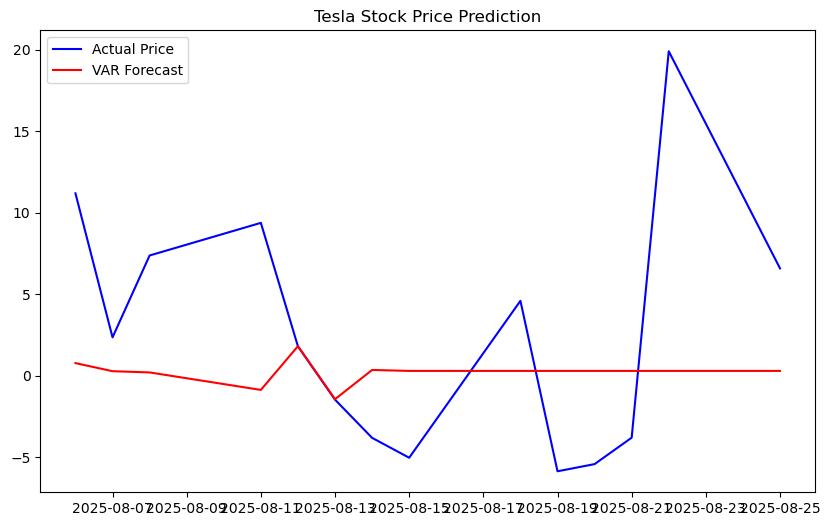

RMSE:  7.76


In [40]:
# VMA
model = VARMAX(train_data, order = (0, 7))
result = model.fit()
predictions = result.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic=False)

plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price', color = 'blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'VAR Forecast', color = 'red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)

## VARIMA

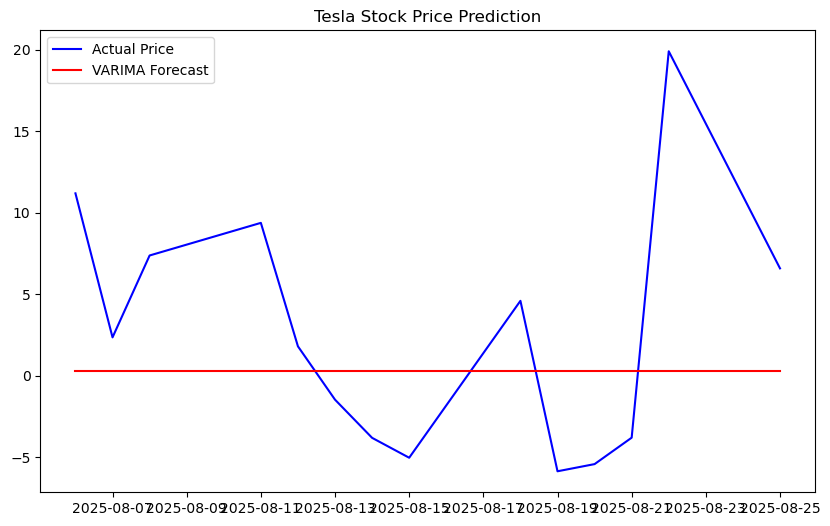

RMSE:  7.72


In [41]:
# VARIMA
model = VARMAX(train_data, order = (14,14))
result = model.fit()
predictions = result.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False)
plt.figure(figsize = (10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price', color = 'blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'VARIMA Forecast', color = 'red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)

# Smooothing Methods

## Moving Average

[*********************100%***********************]  1 of 1 completed


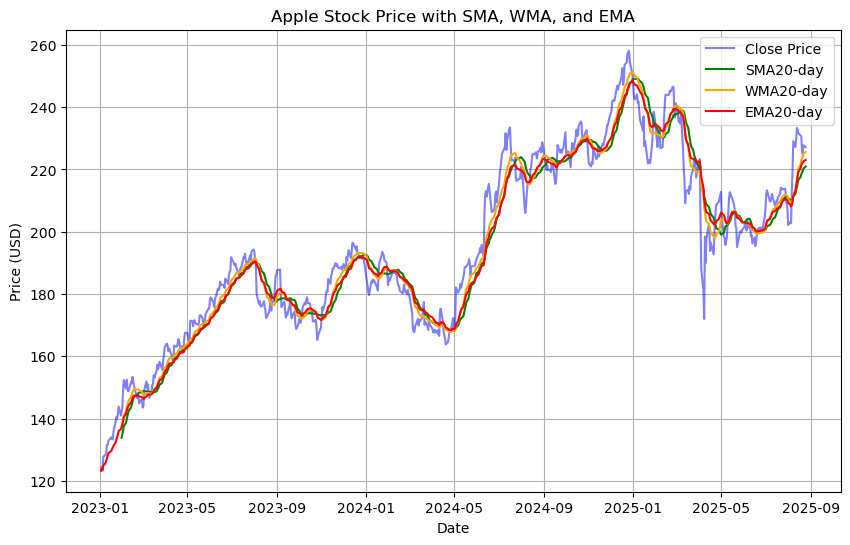

In [42]:
stock_data = yf.download('AAPL', start = '2023-01-01')
window_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window = window_size).mean()

# Caluclate Weighted Moving Average (WMA)
weights = np.arange(1, window_size+1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

#Calculate Expoential Moving Average (EMA)
stock_data['EMA'] = stock_data['Close'].ewm(span = window_size).mean()

# Plotting
plt.figure(figsize = (10, 6))
plt.plot(stock_data['Close'], label = 'Close Price', color = 'blue', alpha = 0.5)
plt.plot(stock_data['SMA'], label = f'SMA{window_size}-day', color = 'green')
plt.plot(stock_data['WMA'], label = f'WMA{window_size}-day', color = 'orange')
plt.plot(stock_data['EMA'], label = f'EMA{window_size}-day', color = 'red')

plt.title('Apple Stock Price with SMA, WMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

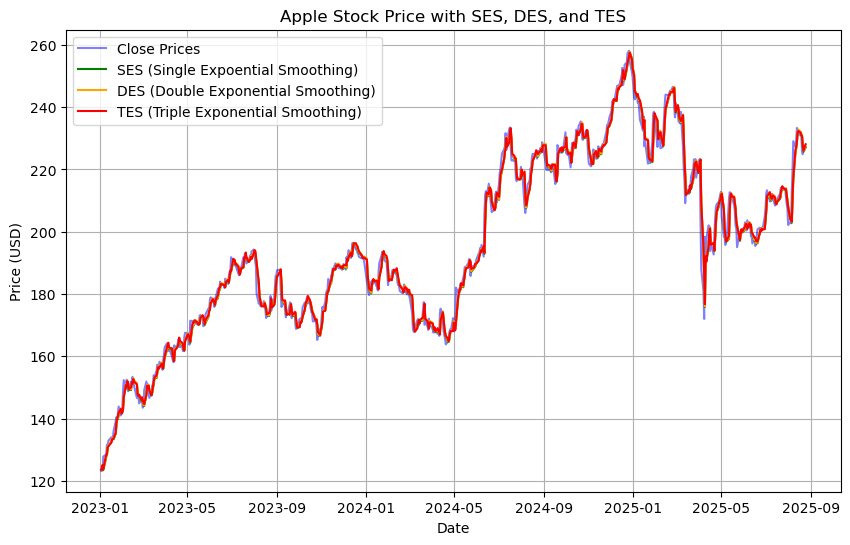

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_prices = stock_data['Close']
ses_model = ExponentialSmoothing(close_prices).fit(smoothing_level = 0.7)
stock_data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) - Holt's Linear trend model
des_model = ExponentialSmoothing(close_prices, trend = 'add').fit(smoothing_level = 0.7)
stock_data['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES) - Holt's-Winters method
tes_model = ExponentialSmoothing(close_prices, trend = 'add', seasonal = 'add', seasonal_periods = 12).fit(smoothing_level = 0.7)
stock_data['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize = (10, 6))
plt.plot(stock_data['Close'], label = 'Close Prices', color = 'blue', alpha = 0.5)
plt.plot(stock_data['SES'], label = 'SES (Single Expoential Smoothing)', color = 'green')
plt.plot(stock_data['DES'], label = 'DES (Double Exponential Smoothing)', color = 'orange')
plt.plot(stock_data['TES'], label = 'TES (Triple Exponential Smoothing)', color = 'red')

plt.title('Apple Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# ACF and PACF Plot

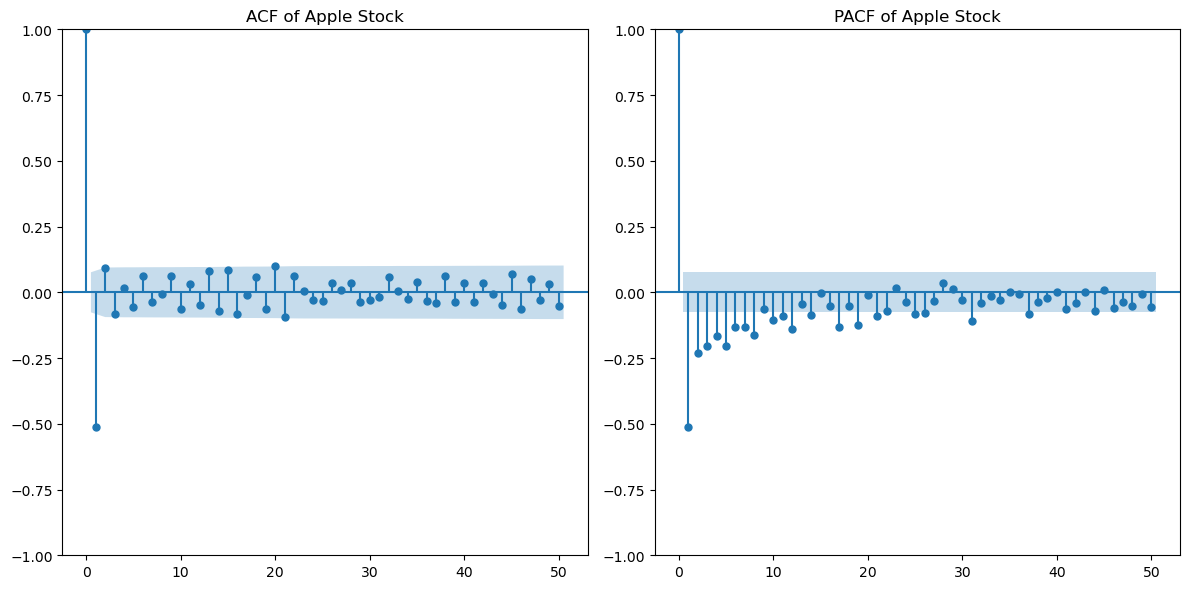

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = (12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags = 50)
plt.title('ACF of Apple Stock')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags = 50, method = 'ywm')
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()

q = 1, p =8

# Model Evaluation Metrics

In [45]:
train_data, test_data = apple_price_stationary[: -30], apple_price_stationary[-30:]

# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data['AAPL']) - predictions) / list(test_data['AAPL']))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion (AIC): {aic}')
print(f'Bayesian Information Criterion (BIC) {bic}')

Mean Absolute Error (MAE): 2.442162537496525
Mean Squared Error (MSE): 12.368740125342747
Root Mean Squared Error (RMSE): 3.516921967479908
Mean Absolute Percentage Error (MAPE): 142.8968574780684%
Akaike Information Criterion (AIC): 3152.1917942279274
Bayesian Information Criterion (BIC) 3293.00003247781


In [47]:
# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 20)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data['AAPL']) - predictions) / list(test_data['AAPL']))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion (AIC): {aic}')
print(f'Bayesian Information Criterion (BIC) {bic}')

Mean Absolute Error (MAE): 2.296385904911787
Mean Squared Error (MSE): 11.761525502465648
Root Mean Squared Error (RMSE): 3.42950805546009
Mean Absolute Percentage Error (MAPE): 118.84980693856126%
Akaike Information Criterion (AIC): 3196.586660401249
Bayesian Information Criterion (BIC) 3293.75477061652
